<a href="https://colab.research.google.com/github/abhi9716/notebooks/blob/master/JS_Divergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jensen-Shannon Divergence

 Jensen–Shannon divergence is another measure of similarity between two probability distributions, bounded by [0,1].

KL Divergence is very nice in terms of what it measures, but it is not a metric that we could depend on. Why is that? It is hidden inside its asymmetric nature. KL(X||Y)≠KL(Y||X) and that is a big problem as we cannot create a proper measure of between two observations without considering which is the reference and which one is the one that we measure the distance between the reference vector. 

Instead of looking at the distance between probability distributions to each other, what if we measure an average of them with every single of the probability distribution in order to have a symmetric distance metric.

\begin{equation*}
JSD(X||Y) = \frac{1}{2}KL(X||M)+\frac{1}{2}KL(Y||M) 
\end{equation*}

Where A:
    
\begin{equation*}
M = \frac{1}{2}(X+Y) 
\end{equation*}

and it does not matter the order anymore:
\begin{equation*}
JSD(X||Y)=JSD(Y||X)
\end{equation*}

reference:https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence

Python implementation of JS_Divergence:

In [0]:
#import library
import pandas as pd
import numpy as np
from scipy import stats

def JS_Divergence(dt1,dt2):
    
    p=[x/np.sum(dt1.values) for x in dt1.values]
    q=[x/np.sum(dt2.values) for x in dt2.values]
    
    ## convert to np.array
    p, q = np.asarray(p), np.asarray(q)
    
    ## normalize p, q to probabilities
    p, q = p/p.sum(), q/q.sum()
    
    m = 1./2*(p + q)
    
    return stats.entropy(p,m)/2. +  stats.entropy(q, m)/2.

In [0]:
#lets define data
data1 = [[4-4.5,"a", 1], [4.5-5,"b", 3], [5-5.5,"c", 8],  [5.5-6,"d", 8]]
data2 = [[4-4.5,"a", 2], [4.5-5,"b", 5], [5-5.5,"c", 7],  [5.5-6,"d", 6]]
data3 = [[4-4.5,"a", 1], [4.5-5,"b", 2], [5-5.5,"c", 6],  [5.5-6,"d", 11]]
class_A=pd.DataFrame(data1,columns = ['height','range', 'no_of_students'])
class_B=pd.DataFrame(data2,columns = ['height','range', 'no_of_students'])
class_C=pd.DataFrame(data3,columns = ['height','range', 'no_of_students'])

In [0]:
JS_Divergence(class_A.no_of_students,class_B.no_of_students)

0.014981892668391106

/home/abhi/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


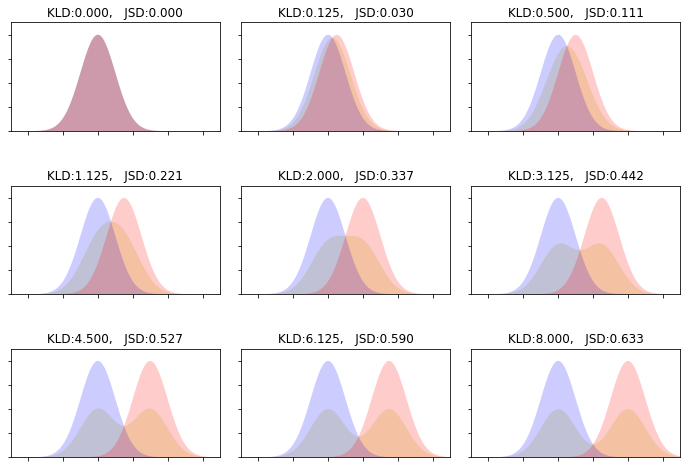

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, entropy

# data prep
x = np.linspace(-10.0, 10.0, 1000)

# graph setting
plt.figure(figsize=(12,8))

# gradually shift the distribution
for i in np.arange(3):
    for j in np.arange(3):
        # index to shift
        index = i*3 + j
        # probabilistic distribution function
        p = norm.pdf(x, loc=0, scale=1)
        q = norm.pdf(x, loc=index*0.5, scale=1)
        # mean of them
        m = (p+q)/2
        # scipy entropy
        kl = entropy(p, q)
        
        # prep for js divergence
        kl_pm = entropy(p, m)
        kl_qm = entropy(q, m)
        js = (kl_pm + kl_qm)/2
        plt.subplot(3,3,i*3+j+1)
        plt.fill_between(x, m, facecolor="y", alpha=0.2)
        plt.fill_between(x, p, facecolor="b", alpha=0.2)
        plt.fill_between(x, q, facecolor="r", alpha=0.2)
        plt.xlim(-5, 7)
        plt.ylim(0,0.45)
        plt.title("KLD:{:>.3f}".format(kl) + ",   JSD:{:>.3f}".format(js))
        plt.tick_params(labelbottom="off")
        plt.tick_params(labelleft="off")

plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

KL:  0.4999997133484283


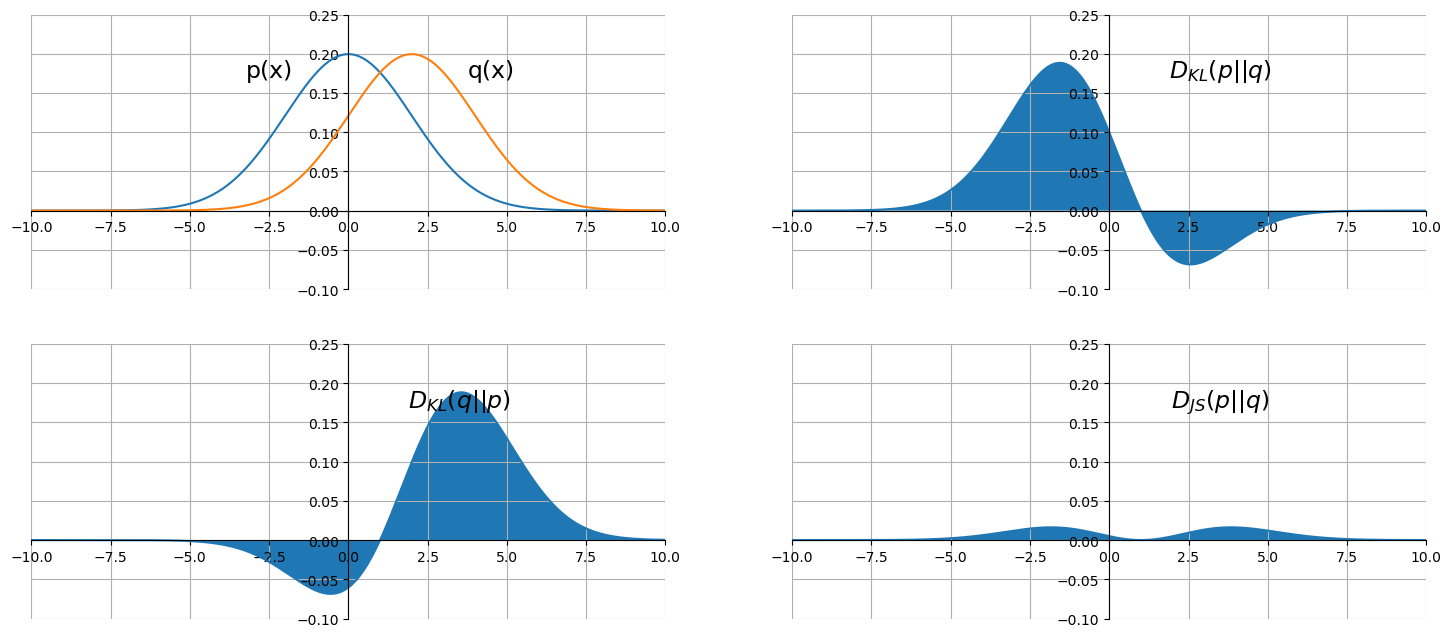

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab

from scipy.stats import norm
from scipy.integrate import quad

def p(x):
    return norm.pdf(x, 0, 2)

def q(x):
    return norm.pdf(x, 2, 2)

def p(x):
    return norm.pdf(x, 0, 2)

def m(x):
    return (p(x)+q(x))/2

def JS(x):
    return (p(x) * np.log( p(x) / m(x) )+q(x) * np.log( q(x) / m(x) ))/2
    
    

def KL(x):
    return p(x) * np.log( p(x) / q(x) )

def KL1(x):
    return q(x) * np.log( q(x) / p(x) )

range = np.arange(-10, 10, 0.001)

KL_int, err = quad(KL, -10, 10) 
print( 'KL: ', KL_int )

fig = plt.figure(figsize=(18, 8), dpi=100)

#---------- First Plot

ax = fig.add_subplot(2,2,1)
ax.grid(True)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.set_xlim(-10,10)
ax.set_ylim(-0.1,0.25)

ax.text(-2.5, 0.17, 'p(x)', horizontalalignment='center',fontsize=17)
ax.text(4.5, 0.17, 'q(x)', horizontalalignment='center',fontsize=17)

plt.plot(range, p(range))
plt.plot(range, q(range))

#---------- Second Plot

ax = fig.add_subplot(2,2,2)
ax.grid(True)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.set_xlim(-10,10)
ax.set_ylim(-0.1,0.25)

ax.text(3.5, 0.17, r'$D_{KL}(p||q)$', horizontalalignment='center',fontsize=17)

ax.plot(range, KL(range))

ax.fill_between(range, 0, KL(range))

#---------- third Plot

ax = fig.add_subplot(2,2,3)
ax.grid(True)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.set_xlim(-10,10)
ax.set_ylim(-0.1,0.25)

ax.text(3.5, 0.17, r'$D_{KL}(q||p)$', horizontalalignment='center',fontsize=17)

ax.plot(range, KL1(range))

ax.fill_between(range, 0, KL1(range))


#---------- fourth Plot

ax = fig.add_subplot(2,2,4)
ax.grid(True)
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.set_xlim(-10,10)
ax.set_ylim(-0.1,0.25)

ax.text(3.5, 0.17, r'$D_{JS}(p||q)$', horizontalalignment='center',fontsize=17)

ax.plot(range, JS(range))

ax.fill_between(range, 0, JS(range))


plt.show()

Given two Gaussian distribution, p with mean=0 and std=1 and q with mean=1 and std=1. The average of two distributions is labelled as m=(p+q)/2. KL divergence DKL is asymmetric but JS divergence DJS is symmetric.


